In [4]:
import process as pc
from IPython.core.interactiveshell import InteractiveShell

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import joblib
import cv2

import numpy as np

InteractiveShell.ast_node_interactivity = "all"
%config Completer.use_jedi = False

In [5]:
def print_image(image, keypoints):
    _, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(image)
    for kp in keypoints:
        rect = patches.Rectangle((kp[0]-40, kp[1]-40), kp[0]+40, kp[1]+40, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show();

In [6]:
pipeline_save_path = pc.DATA_PATH+"/hog_features_train_test_no_norm.pkl"
image_path = pc.DATA_PATH+"/final/amadeus.jpg"
#image_path =pc.DATA_PATH+"/img_align_celeba/073425.jpg"

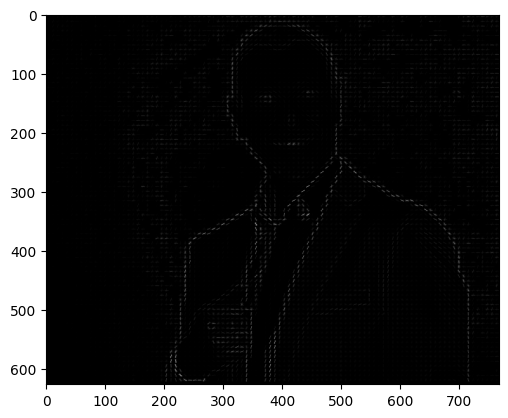

In [4]:
from skimage.feature import hog
image = cv2.imread(image_path)
image = cv2.resize(image, (int(image.shape[1]*0.75), int(image.shape[0]*0.75)))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.equalizeHist(image)
#image = pc.process_image(image, resize=True, img_resize=(int(image.shape[1]*0.75), int(image.shape[0]*0.75)))
features, hog_img = hog(image, visualize=True)
plt.imshow(hog_img, cmap='gray');

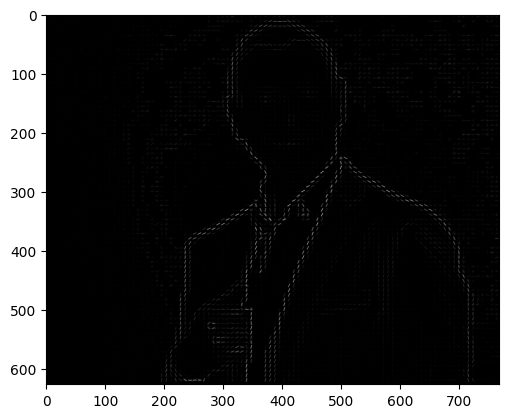

In [5]:
image = cv2.imread(image_path)
image = pc.process_image(image, resize=True, img_resize=(int(image.shape[1]*0.75), int(image.shape[0]*0.75)))
features, hog_img = hog(image, visualize=True)
plt.imshow(hog_img, cmap='gray');

In [7]:
image = cv2.imread(image_path)
pipeline = joblib.load(pipeline_save_path)
keypoints, _ = pc.detect_faces(image, pipeline, method='HOG', threshold=0.6, window_size=(96, 96), step_size=(64,64),\
                                n_keypoints=8100, resize=False, image_size=(int(image.shape[1]*0.75), int(image.shape[0]*0.75)),\
                                     preprocess=False, verbose=True, notebook=True)
keypoints

(96, 96, 3)
Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.
(96, 96, 3)
Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.
(96, 96, 3)
Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.
(96, 96, 3)
Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.
(96, 96, 3)
Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.
(96, 96, 3)
Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.
(96, 96, 3)
Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.
(96, 96, 3)
Only images with two spatial dimensions are supported. If using 

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print_image(image, keypoints)